In [8]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
# Importando o módulo de Regressão Linear do scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from Análise_de_Correlação import analiseCorr
from Normalização import normalizaDf
df= pd.read_excel("input_acoes_NotasFundamentei_20200517.xlsx")
abas= pd.ExcelFile("input_planilhaCanalHolder_20200211.xlsx")
MA=abas.parse('Múltiplos Ações')
FA=abas.parse('Fundamentos Ações')

In [9]:
#Join das tabelas "Fundamentos ações" e "NotasCanalFundamentei" e um merge entre as duas primeiras abas do arquivo input_planilhaCanalHolder_20200211.xlsx
MA=MA.join(df.set_index("Código de Neg."),on="Código de Neg.")
uniaoAbas = pd.merge(MA, FA, on="Nome", how='outer', suffixes=('', '_y'))
uniaoAbas = uniaoAbas.drop(list(uniaoAbas.filter(regex='_y$')), axis=1)
#Remoção de uma coluna inútil
uniaoAbas.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
#Removando uma coluna de notas que nao foi utilizada, pois tem dados faltando
uniaoAbas.drop("NotaFundamentei20200201",axis=1,inplace=True)

In [28]:
#Selecionando todas as empresas que possuem notas e estão com seus dados completos
empresasComNotas=uniaoAbas.replace("-",np.nan)
empresasComNotas.dropna(inplace=True)

In [121]:
#Normalizando o dataFrames
#.drop('NotaFundamentei', axis=1)
dfCNota=normalizaDf(empresasComNotas)

In [188]:
#Gerando a analise de correlação dos atributos, já excluindo a "NotaFundamentei" da resposta
analise=analiseCorr("NotaFundamentei",dfCNota)[1:]

In [217]:
#Selecionando os melhores atributos para treinar o regressor
melhoresAtributos=[]
count=0
for k in analiseCorrelação.values:
    if (k > 0.3) | (k< -0.3):
        melhoresAtributos.append(analise.axes[0][count])
    count+=1

In [238]:
X,y=dfCNota[melhoresAtributos], empresasComNotas["NotaFundamentei"]

(32, 20)

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

(10, 20)

In [220]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [221]:
Y_prev = regression.predict(X_test)

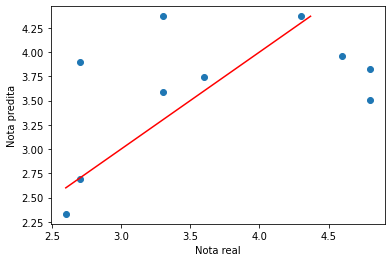

In [222]:
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.xlabel('Nota real')
plt.ylabel('Nota predita')
plt.show()

In [223]:
from sklearn.metrics import mean_absolute_error
print(f'MAE {mean_absolute_error(y_test, Y_prev)}')

MAE 0.5950711501468895


In [224]:
from sklearn.metrics import mean_squared_error
print(f'MSE {mean_squared_error(y_test, Y_prev)}')

MSE 0.5782778906355268


In [229]:
#Criando um outro dataFrame para vizualizar NotaFundamentei x NotaPredita 
emp=empresasComNotas.loc[X_test.index.values,["Nome","Código de Neg.","NotaFundamentei"]]

In [230]:
emp["NotaPredita"]=Y_prev.round(1)

In [231]:
emp.sort_values("NotaFundamentei",ascending=False)

,Nome,Código de Neg.,NotaFundamentei,NotaPredita
136,Engie Brasil,EGIE3,4.8,3.5
228,Lojas Renner,LREN3,4.8,3.8
149,Fleury,FLRY3,4.6,4.0
175,Hypera,HYPE3,4.3,4.4
277,Qualicorp,QUAL3,3.6,3.7
178,Iguatemi,IGTA3,3.3,3.6
356,Totvs,TOTS3,3.3,4.4
322,Smiles,SMLS3,2.7,3.9
263,Petrobras,PETR3,2.7,2.7
63,BR Malls Par,BRML3,2.6,2.3
